In [ ]:
# LAB 01

import pandas as pd
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import io

In [ ]:
uploaded = files.upload()

Saving flower.png to flower.png


In [ ]:
filename = list(uploaded.keys())[0]

In [ ]:
image = Image.open(io.BytesIO(uploaded[filename]))

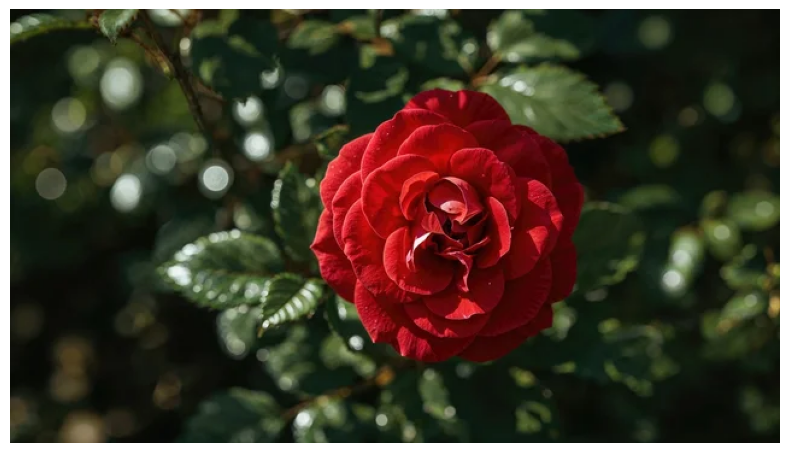

In [ ]:
plt.figure(figsize=(8,5))
plt.imshow(image)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
print(f"image.size = {image.size}")
print(f"image.mode = {image.mode}")

image.size = (639, 360)
image.mode = RGB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 00d715b92f.jpg to 00d715b92f.jpg
Saving 00f3f4ad78.jpg to 00f3f4ad78.jpg
Saving 0ae299fb48.jpg to 0ae299fb48.jpg
Saving 0da8c6d908.jpg to 0da8c6d908.jpg
Saving 0eb3e19c9f.jpg to 0eb3e19c9f.jpg
Saving 0f8118f855.jpg to 0f8118f855.jpg
Saving 0fdebf2100.jpg to 0fdebf2100.jpg
Saving 01c0ec8fe0.jpg to 01c0ec8fe0.jpg
Saving 002c100a56.jpg to 002c100a56.jpg
Saving 03e4399115.jpg to 03e4399115.jpg
Saving 06caeb294f.jpg to 06caeb294f.jpg
Saving 049e058d6f.jpg to 049e058d6f.jpg
Saving 0091d8e97f.jpg to 0091d8e97f.jpg
Saving 099b42be38.jpg to 099b42be38.jpg
Saving 101.jpg to 101.jpg
Saving 0123c8a36a.jpg to 0123c8a36a.jpg
Saving 0128bbb04d.jpg to 0128bbb04d.jpg
Saving 0317c9a033.jpg to 0317c9a033.jpg
Saving 0440ee9cc1.jpg to 0440ee9cc1.jpg
Saving 0620a7e7c0.jpg to 0620a7e7c0.jpg
Saving 0691bb7aa4.jpg to 0691bb7aa4.jpg
Saving 02990a6035.jpg to 02990a6035.jpg
Saving 10066.jpg to 10066.jpg
Saving 10102.jpg to 10102.jpg
Saving 10404.jpg to 10404.jpg
Saving 10447.jpg to 10447.jpg
Saving 11245.j

In [ ]:
import os

# Create folder
os.makedirs("/content/FlowerImages", exist_ok=True)

# Move uploaded files into the folder
for filename in uploaded.keys():
    os.rename(filename, f"/content/FlowerImages/{filename}")

print("✅ All images moved to /content/FlowerImages")


✅ All images moved to /content/FlowerImages


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_folder = "/content/FlowerImages"
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)
               if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print("Total images:", len(image_files))

cols = 5
rows = (len(image_files) + cols - 1) // cols
plt.figure(figsize=(15, 3*rows))
for i, img_path in enumerate(image_files):
    img = mpimg.imread(img_path)
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

Total images found: 203


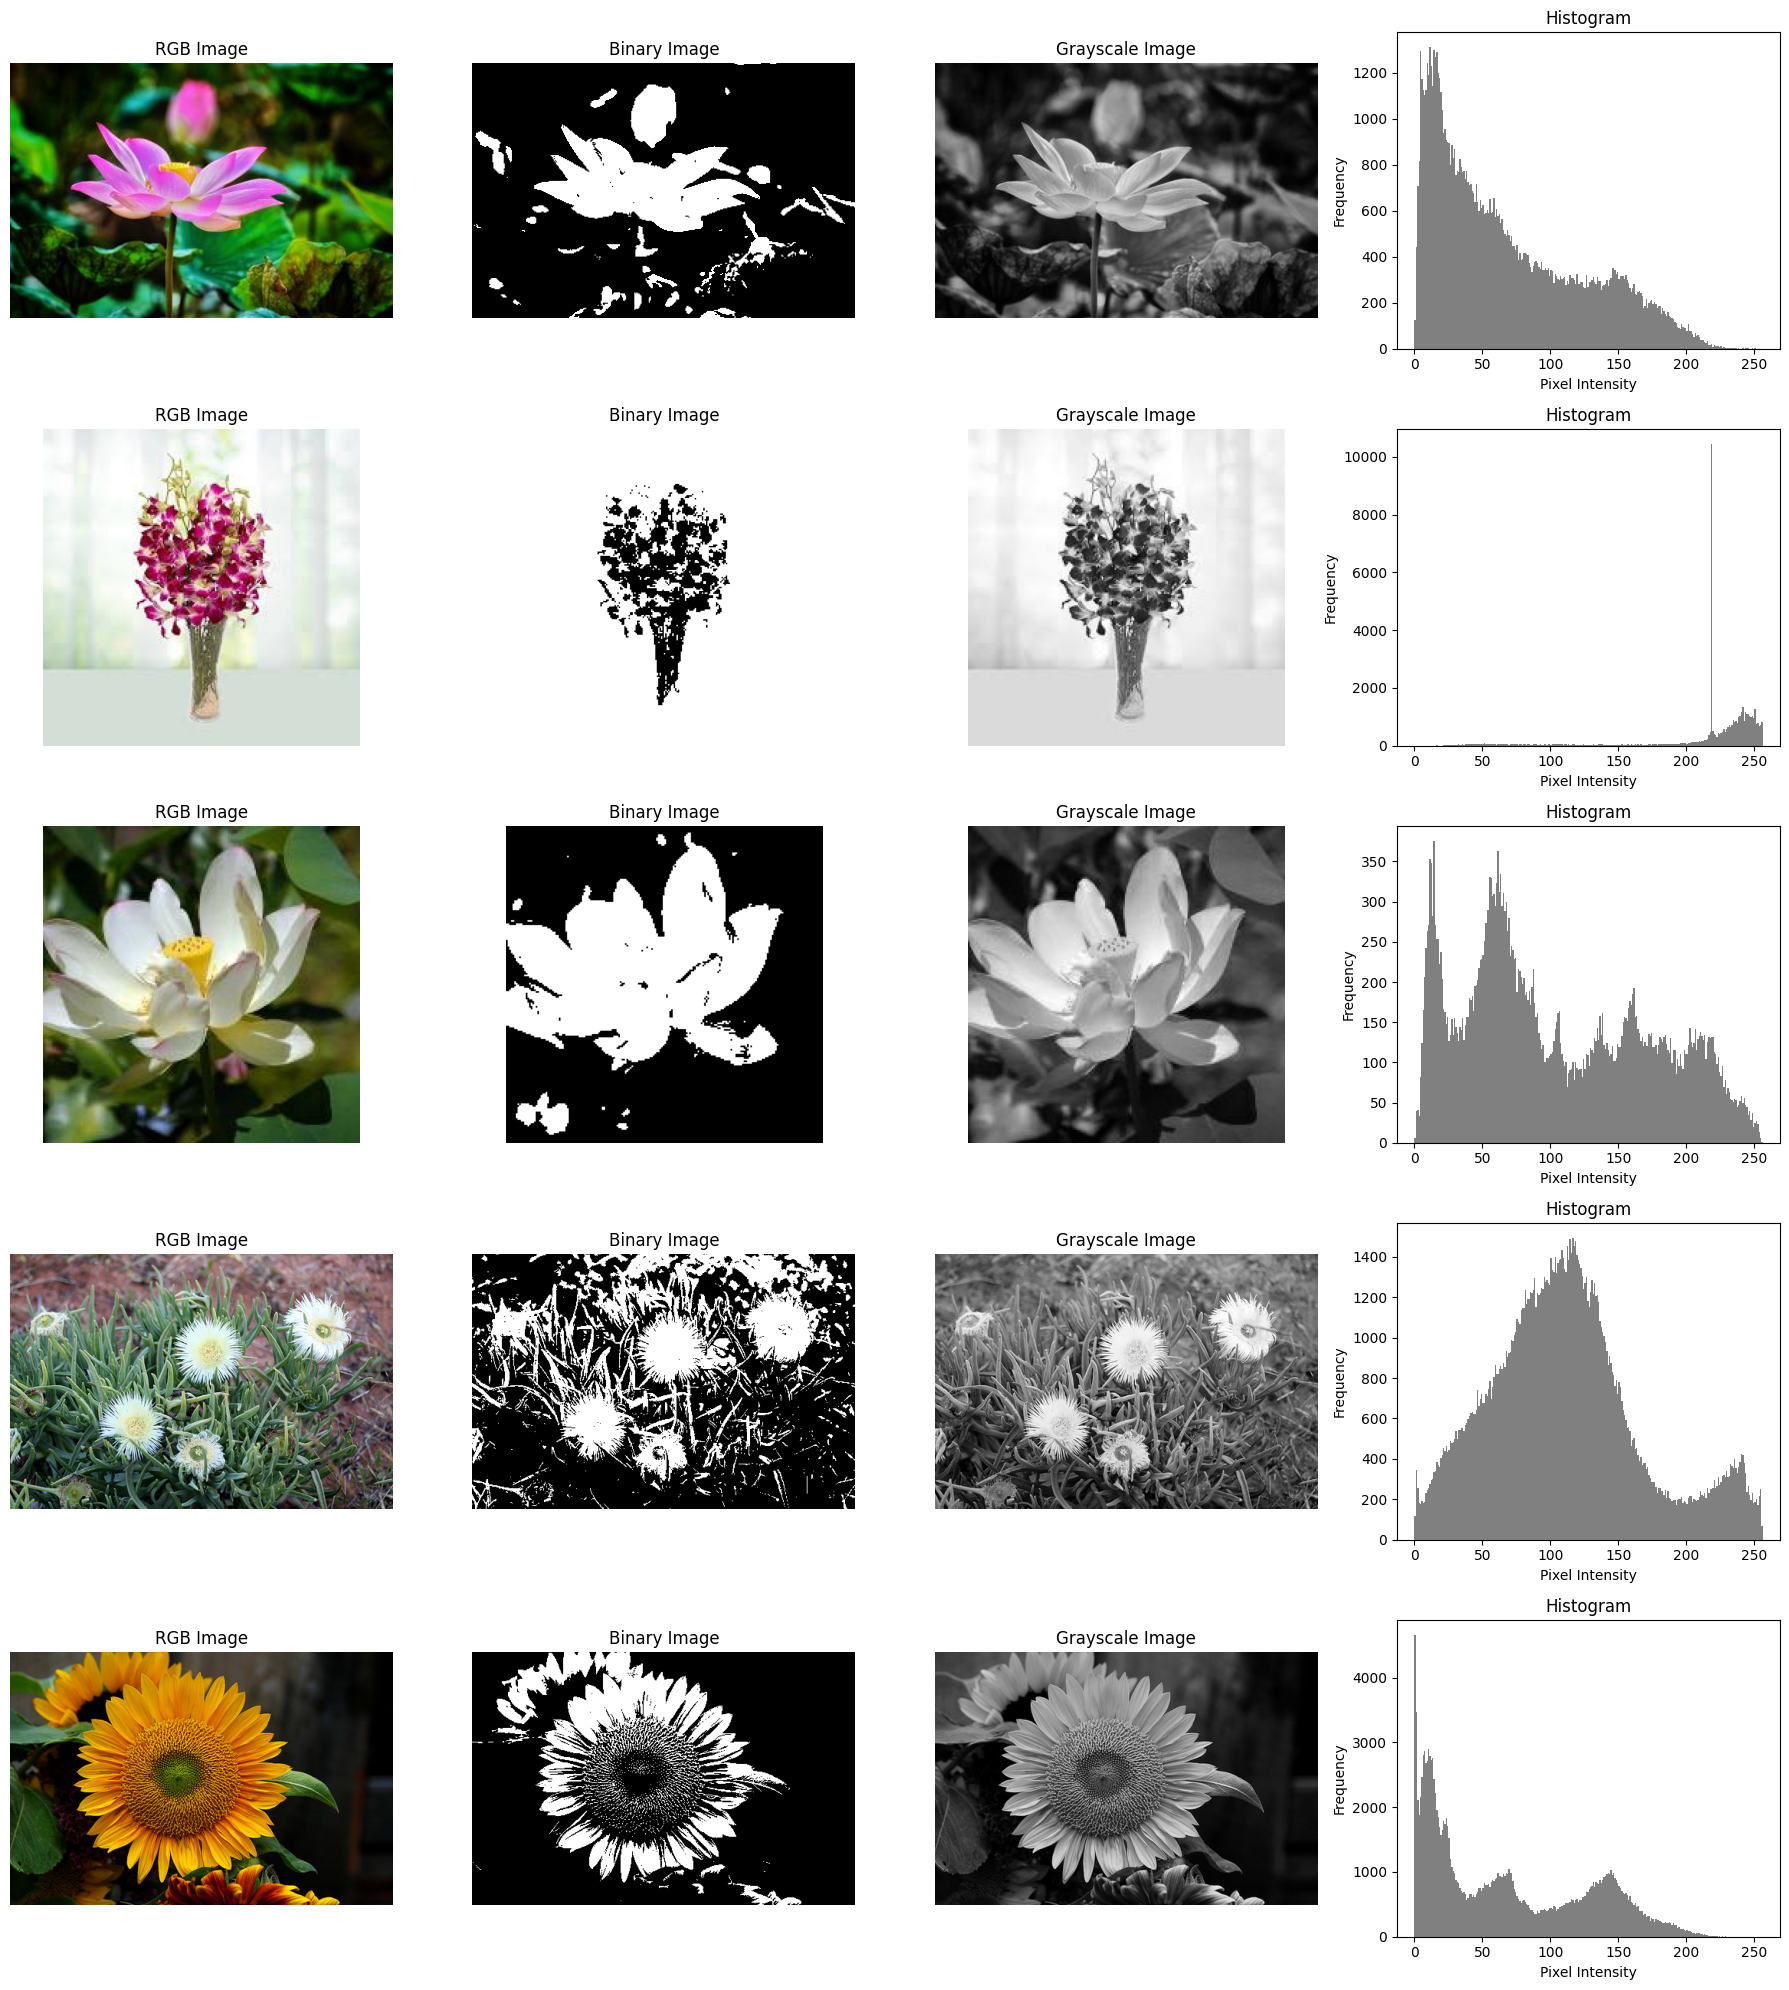

✅ RGB → Binary, RGB → Grayscale, and Histogram Visualization complete!


In [ ]:
# LAB 02
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

input_folder = "/content/FlowerImages"


binary_folder = "/content/BinaryImages"
gray_folder = "/content/GrayImages"
hist_folder = "/content/Histograms"

os.makedirs(binary_folder, exist_ok=True)
os.makedirs(gray_folder, exist_ok=True)
os.makedirs(hist_folder, exist_ok=True)


image_files = [f for f in os.listdir(input_folder)
               if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print("Total images found:", len(image_files))


num_images = 5

plt.figure(figsize=(18, 4 * num_images))

for i, filename in enumerate(image_files[:num_images]):

    img_path = os.path.join(input_folder, filename)
    rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    # ✅ 1. RGB → Grayscale
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    cv2.imwrite(os.path.join(gray_folder, filename), gray)

    # ✅ 2. Grayscale → Binary
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    cv2.imwrite(os.path.join(binary_folder, filename), binary)

    # ✅ 3. Histogram (Grayscale)
    hist, bins = np.histogram(gray.ravel(), bins=256, range=[0,256])

    # Histogram save
    plt.figure()
    plt.plot(hist, color='gray')
    plt.title(f"Histogram of {filename}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.savefig(os.path.join(hist_folder, filename.split('.')[0] + "_hist.png"))
    plt.close()

    # ✅ 4. Visualization (4-in-1 layout)
    plt.subplot(num_images, 4, i*4 + 1)
    plt.imshow(rgb)
    plt.title("RGB Image")
    plt.axis('off')

    plt.subplot(num_images, 4, i*4 + 2)
    plt.imshow(binary, cmap='gray')
    plt.title("Binary Image")
    plt.axis('off')

    plt.subplot(num_images, 4, i*4 + 3)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')

    plt.subplot(num_images, 4, i*4 + 4)
    plt.hist(gray.ravel(), bins=256, range=[0,256], color='gray')
    plt.title("Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

print("✅ RGB → Binary, RGB → Grayscale, and Histogram Visualization complete!")


In [ ]:
# LAB 03
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

input_folder = "/content/FlowerImages"


canny_folder = "/content/CannyEdges"
sobel_folder = "/content/SobelEdges"

os.makedirs(canny_folder, exist_ok=True)
os.makedirs(sobel_folder, exist_ok=True)


image_files = [f for f in os.listdir(input_folder)
               if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print("Total images found:", len(image_files))


num_images = 5

plt.figure(figsize=(15, 4 * num_images))

for i, filename in enumerate(image_files[:num_images]):

    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # ✅ 1. Canny Edge Detection
    canny_edges = cv2.Canny(gray, 100, 200)
    cv2.imwrite(os.path.join(canny_folder, filename), canny_edges)

    # ✅ 2. Sobel Edge Detection
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = cv2.magnitude(sobelx, sobely)
    sobel_edges = np.uint8(np.clip(sobel_edges, 0, 255))
    cv2.imwrite(os.path.join(sobel_folder, filename), sobel_edges)

    # ✅ 3. Visualization — Compare Original, Canny & Sobel
    plt.subplot(num_images, 3, i*3 + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(num_images, 3, i*3 + 2)
    plt.imshow(canny_edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')

    plt.subplot(num_images, 3, i*3 + 3)
    plt.imshow(sobel_edges, cmap='gray')
    plt.title("Sobel Edge Detection")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ Comparison between Canny and Sobel edge detection")


Output hidden; open in https://colab.research.google.com to view.

Total images found: 203


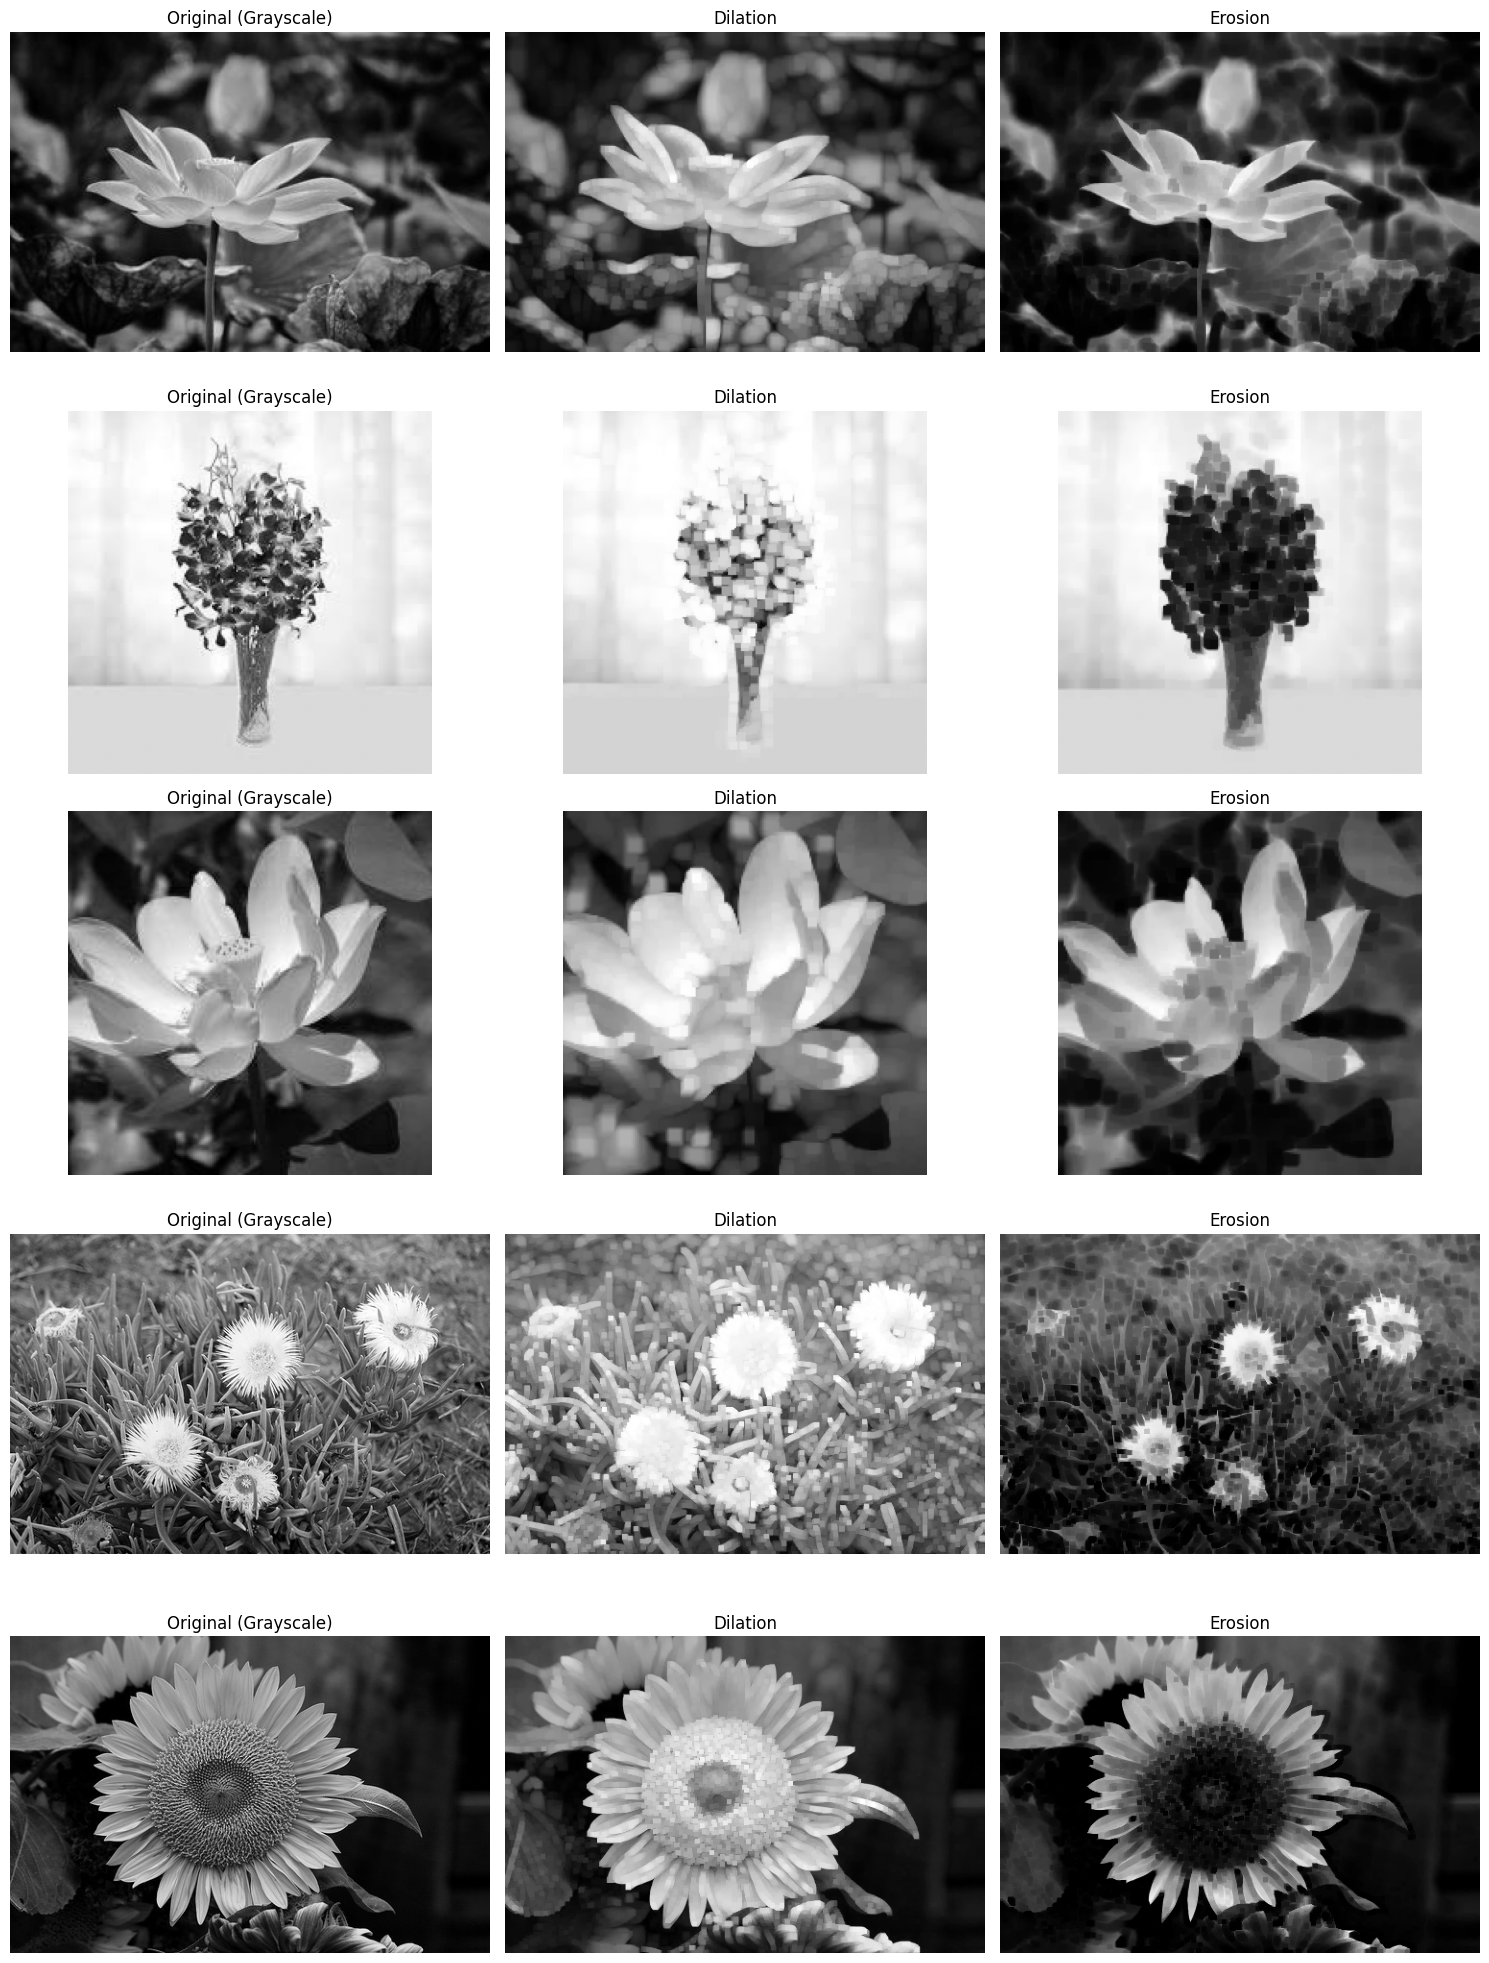

✅ Dilation and Erosion operations completed and visualized successfully!


In [ ]:
# LAB 04
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Input folder (original images)
input_folder = "/content/FlowerImages"

# Output folders for dilation and erosion
dilation_folder = "/content/DilationImages"
erosion_folder = "/content/ErosionImages"

# Create folders if they don't exist
os.makedirs(dilation_folder, exist_ok=True)
os.makedirs(erosion_folder, exist_ok=True)

# List all image files
image_files = [f for f in os.listdir(input_folder)
               if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print("Total images found:", len(image_files))

# Number of images to visualize
num_images = 5

# Structuring element (kernel for morphological operations)
kernel = np.ones((5, 5), np.uint8)

plt.figure(figsize=(15, 4 * num_images))

for i, filename in enumerate(image_files[:num_images]):
    # Read the image
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # ✅ 1. Dilation Operation
    dilation = cv2.dilate(gray, kernel, iterations=1)
    cv2.imwrite(os.path.join(dilation_folder, filename), dilation)

    # ✅ 2. Erosion Operation
    erosion = cv2.erode(gray, kernel, iterations=1)
    cv2.imwrite(os.path.join(erosion_folder, filename), erosion)

    # ✅ 3. Visualization (Original, Dilation, Erosion)
    plt.subplot(num_images, 3, i*3 + 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original (Grayscale)")
    plt.axis('off')

    plt.subplot(num_images, 3, i*3 + 2)
    plt.imshow(dilation, cmap='gray')
    plt.title("Dilation")
    plt.axis('off')

    plt.subplot(num_images, 3, i*3 + 3)
    plt.imshow(erosion, cmap='gray')
    plt.title("Erosion")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ Dilation and Erosion operations completed and visualized successfully!")
